In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Explore Data

In [67]:
data = pd.read_csv('general_data.csv')
#data = pd.read_csv('manager_survey_data.csv')
#data = pd.read_csv('employee_survey_data.csv')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [69]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [70]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [71]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<Axes: >

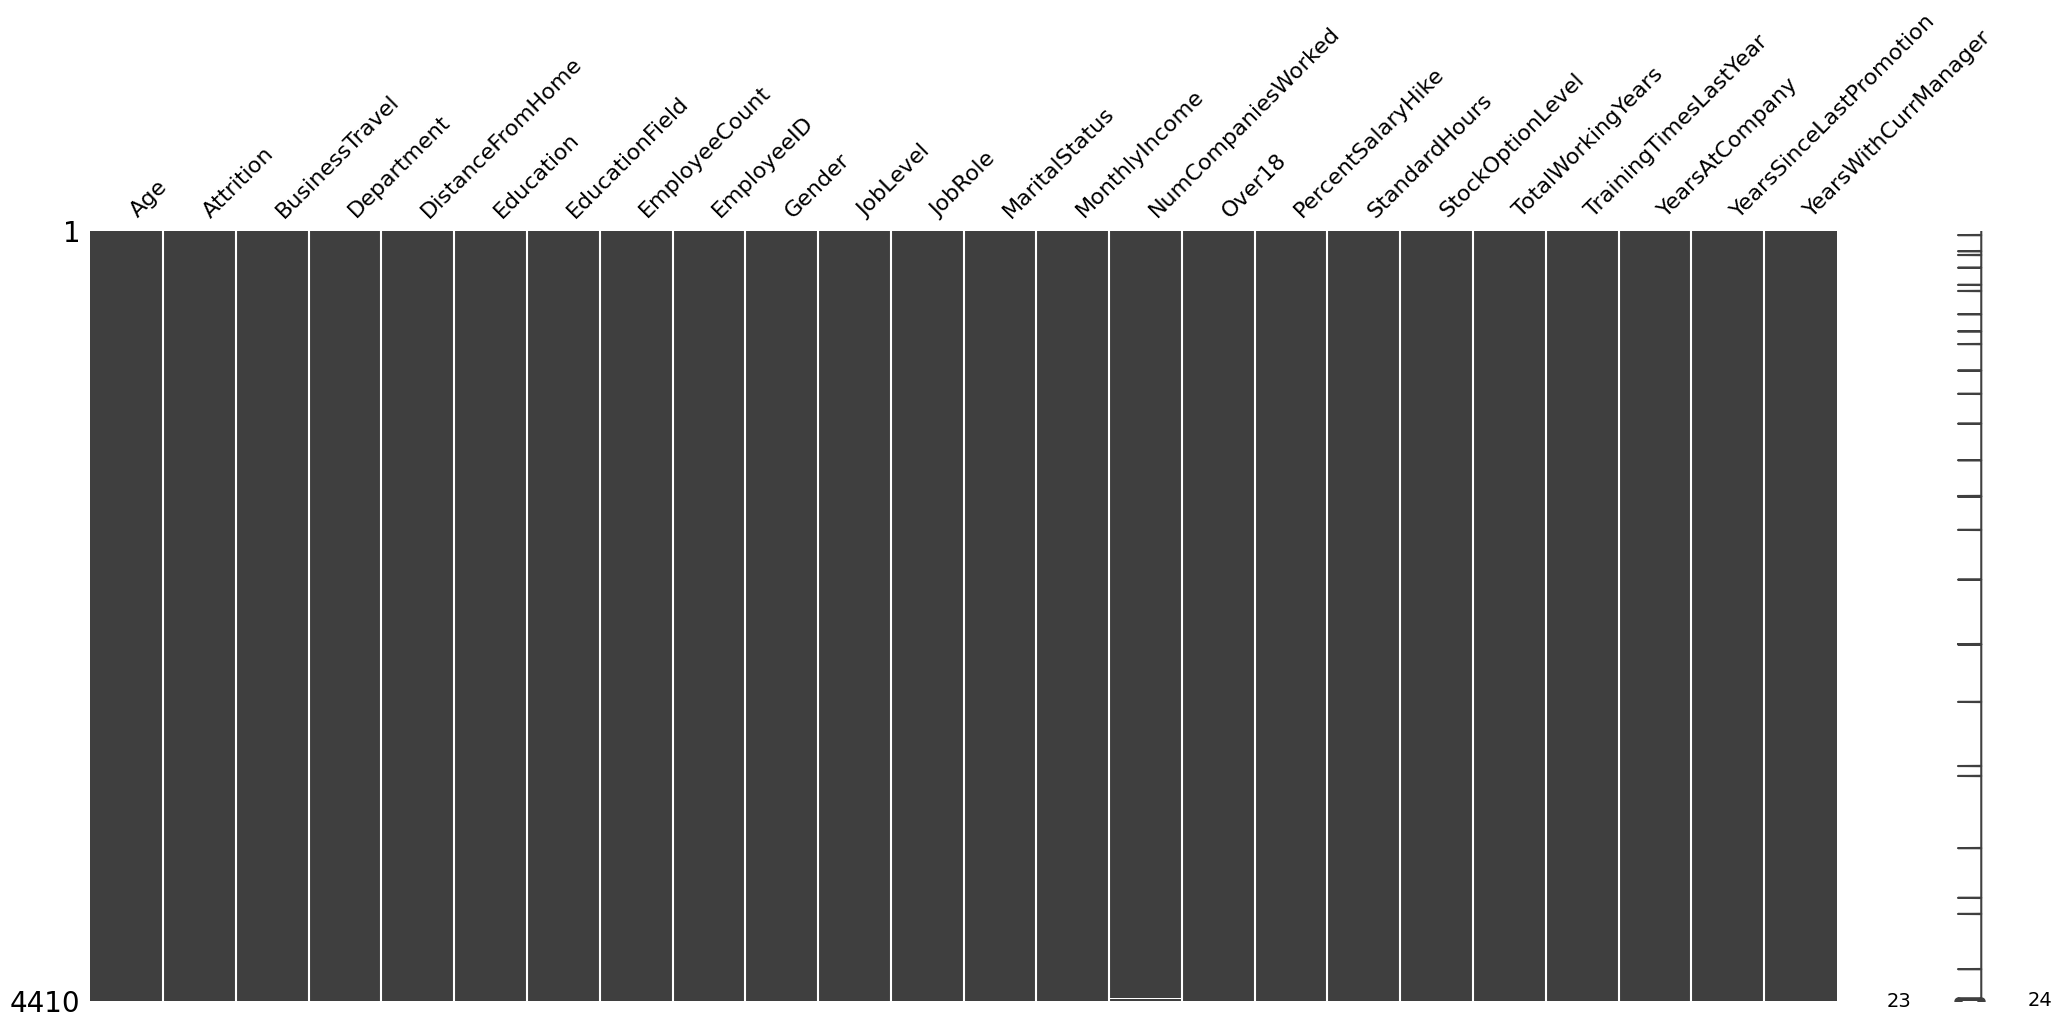

In [72]:
# use missingno library to visualize missing values
import missingno as msno
msno.matrix(data)

In [73]:
data.value_counts() 

Age  Attrition  BusinessTravel     Department              DistanceFromHome  Education  EducationField    EmployeeCount  EmployeeID  Gender  JobLevel  JobRole                MaritalStatus  MonthlyIncome  NumCompaniesWorked  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager
60   No         Travel_Rarely      Sales                   17                4          Medical           1              3892        Male    1         Manager                Divorced       40250          3.0                 Y       13                 8              1                 19.0               5                      1               0                        0                       1
18   No         Non-Travel         Research & Development  1                 4          Medical           1              715         Male    2         Sales Executive        Single         27200          1.0            

## Clear data

In [74]:
# Automatically clear data with only 1 value
data = data.loc[:,data.apply(pd.Series.nunique) != 1]

In [75]:
# Automatically modify missing values with median value for numerical columns and mode value for categorical columns
for col in data.columns:
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        data[col].fillna(data[col].median(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)


C:\Users\quent\AppData\Local\Temp\ipykernel_10732\1713439169.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\quent\AppData\Local\Temp\ipykernel_10732\1713439169.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [76]:
# Recheck missing values
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

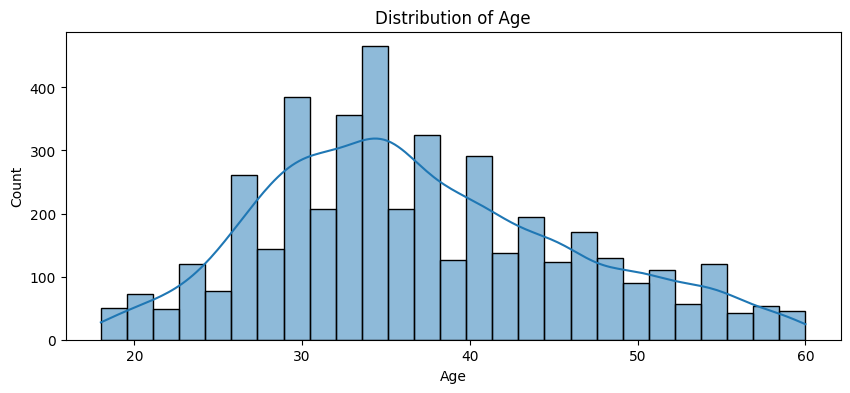

Statistiques pour Age:
count    4410.000000
mean       36.923810
std         9.133301
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64




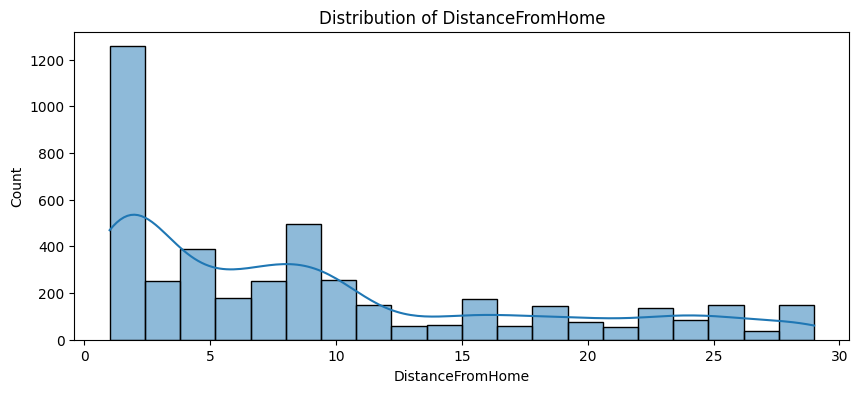

Statistiques pour DistanceFromHome:
count    4410.000000
mean        9.192517
std         8.105026
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64




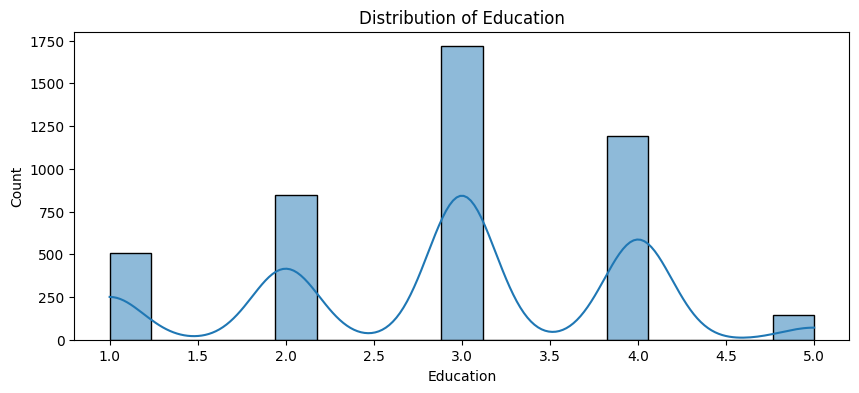

Statistiques pour Education:
count    4410.000000
mean        2.912925
std         1.023933
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64




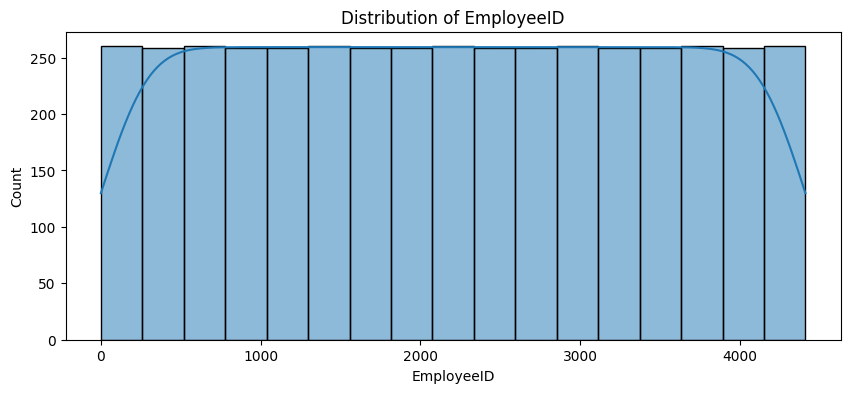

Statistiques pour EmployeeID:
count    4410.000000
mean     2205.500000
std      1273.201673
min         1.000000
25%      1103.250000
50%      2205.500000
75%      3307.750000
max      4410.000000
Name: EmployeeID, dtype: float64




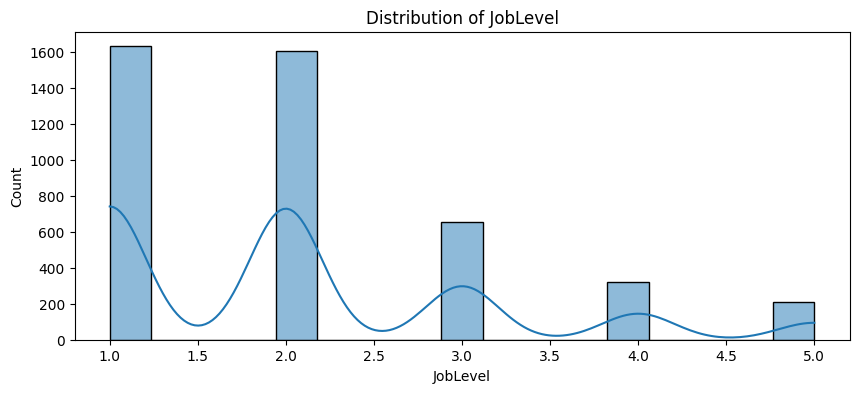

Statistiques pour JobLevel:
count    4410.000000
mean        2.063946
std         1.106689
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64




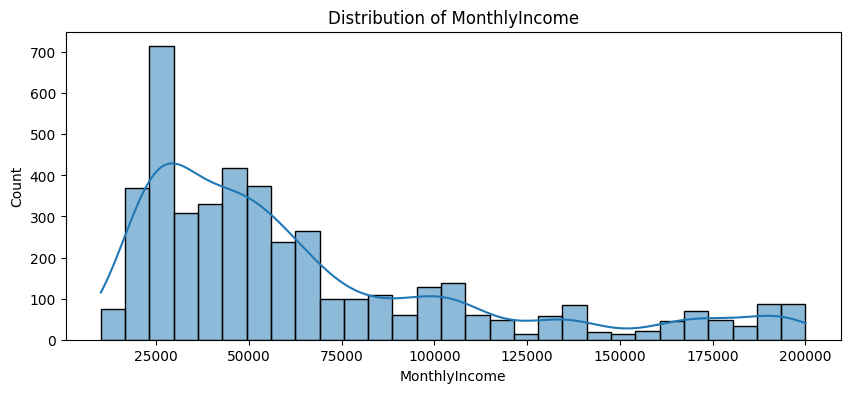

Statistiques pour MonthlyIncome:
count      4410.000000
mean      65029.312925
std       47068.888559
min       10090.000000
25%       29110.000000
50%       49190.000000
75%       83800.000000
max      199990.000000
Name: MonthlyIncome, dtype: float64




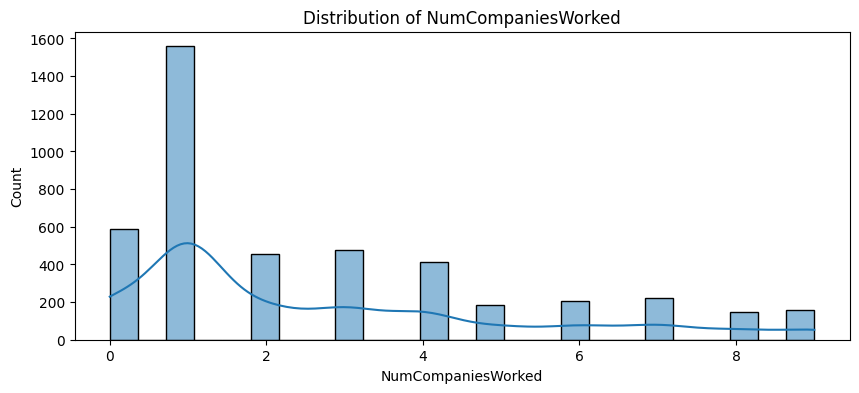

Statistiques pour NumCompaniesWorked:
count    4410.000000
mean        2.691837
std         2.493912
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64




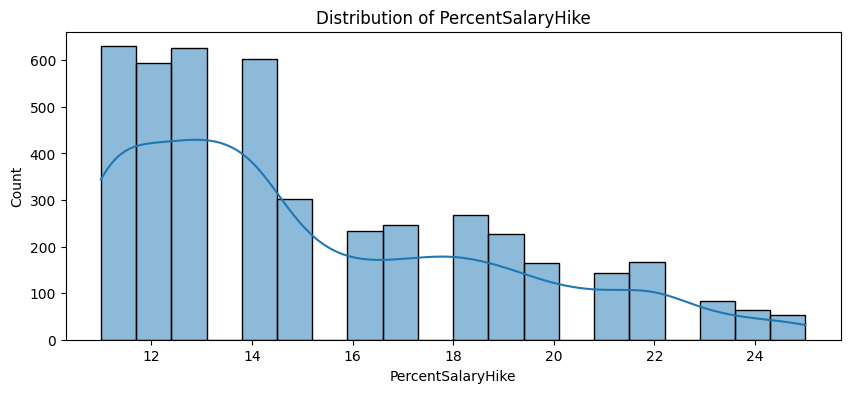

Statistiques pour PercentSalaryHike:
count    4410.000000
mean       15.209524
std         3.659108
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64




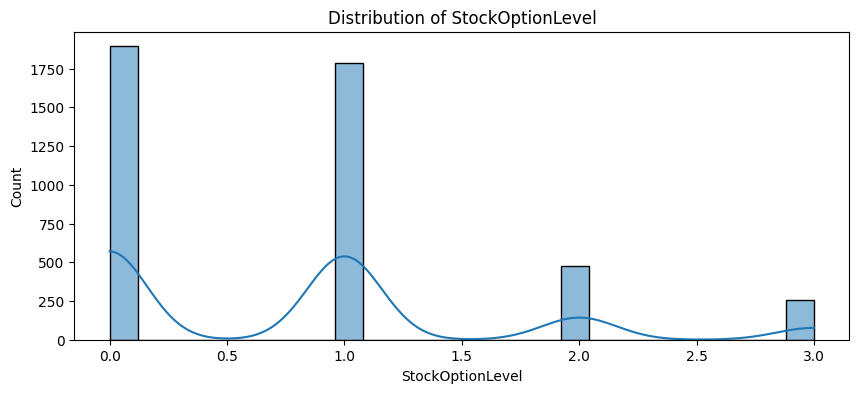

Statistiques pour StockOptionLevel:
count    4410.000000
mean        0.793878
std         0.851883
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64




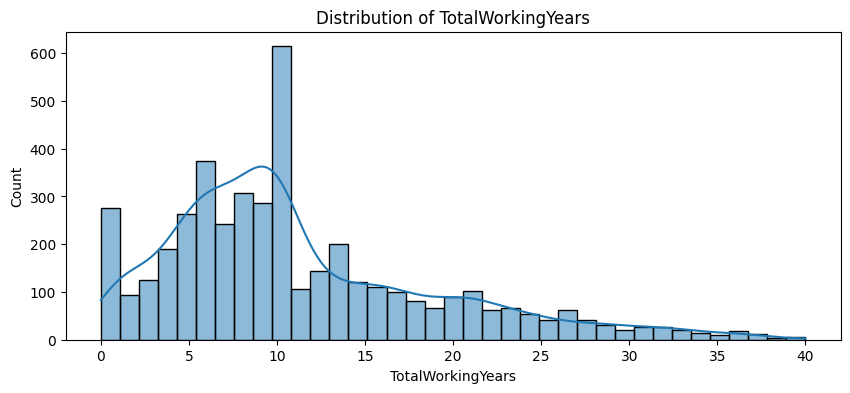

Statistiques pour TotalWorkingYears:
count    4410.000000
mean       11.277324
std         7.774490
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64




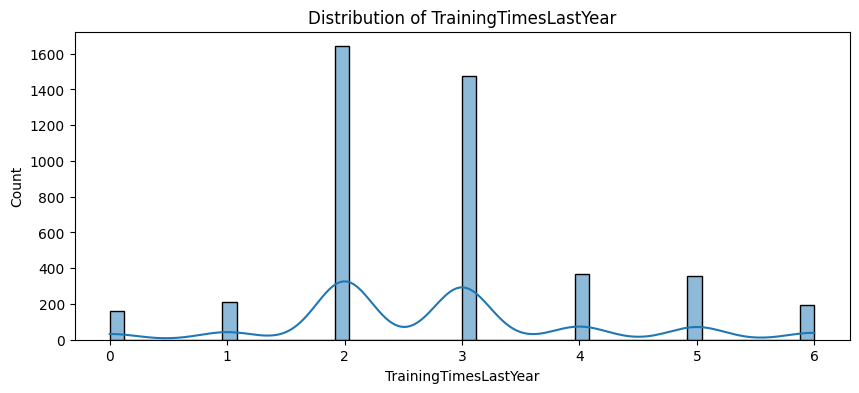

Statistiques pour TrainingTimesLastYear:
count    4410.000000
mean        2.799320
std         1.288978
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64




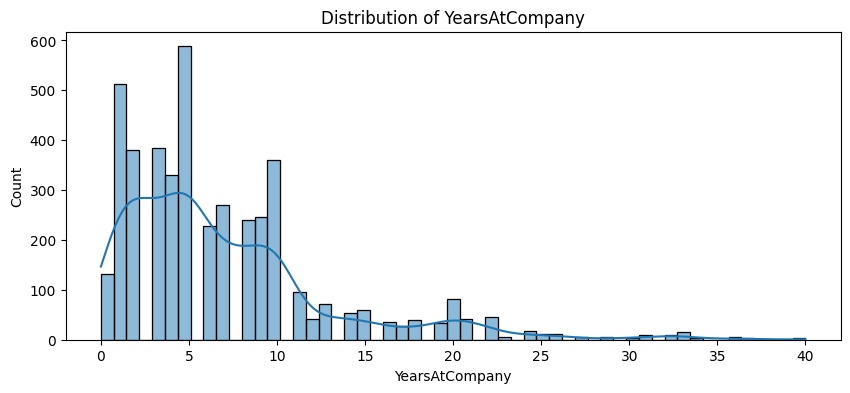

Statistiques pour YearsAtCompany:
count    4410.000000
mean        7.008163
std         6.125135
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64




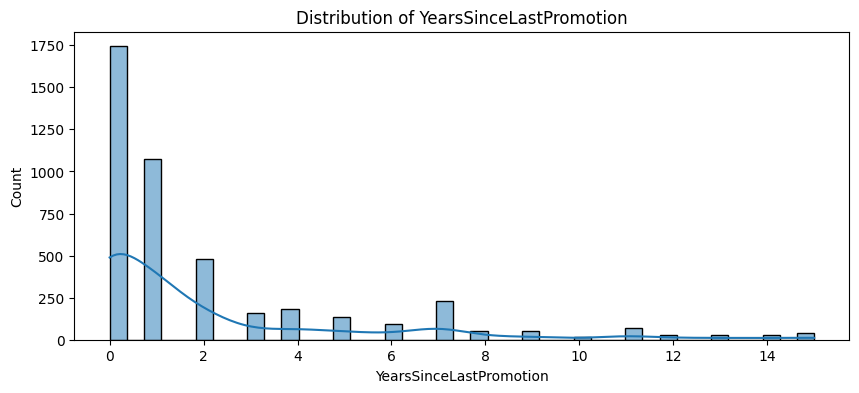

Statistiques pour YearsSinceLastPromotion:
count    4410.000000
mean        2.187755
std         3.221699
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64




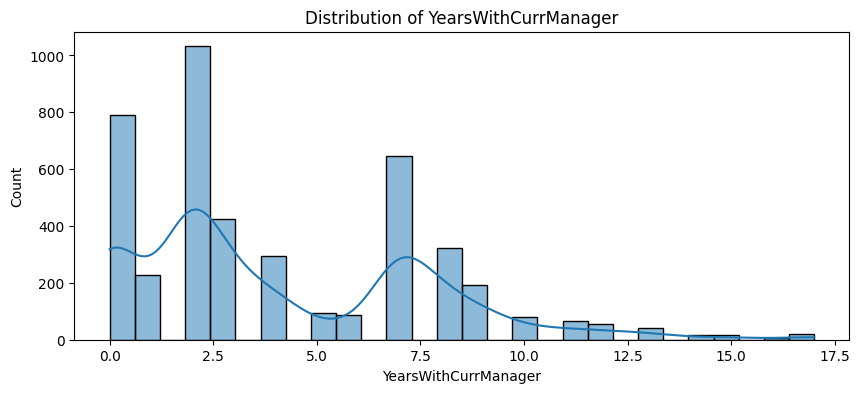

Statistiques pour YearsWithCurrManager:
count    4410.000000
mean        4.123129
std         3.567327
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64




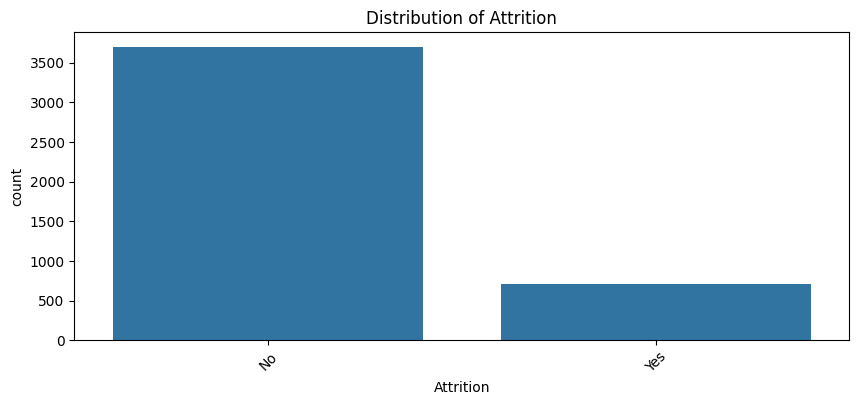

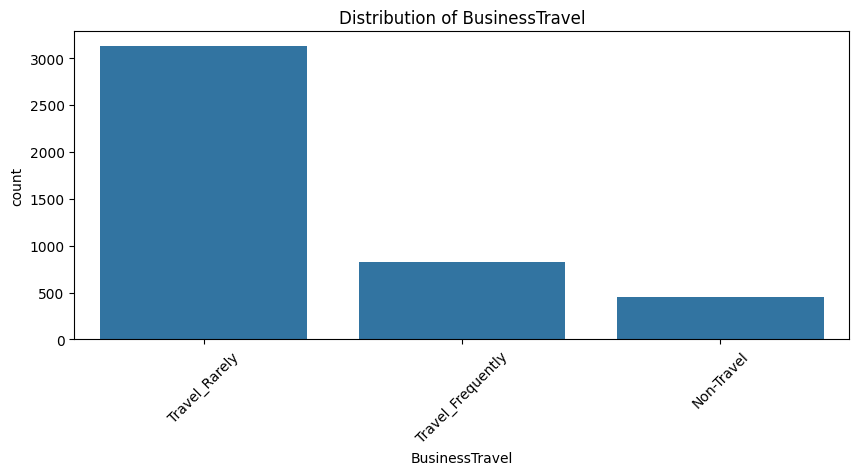

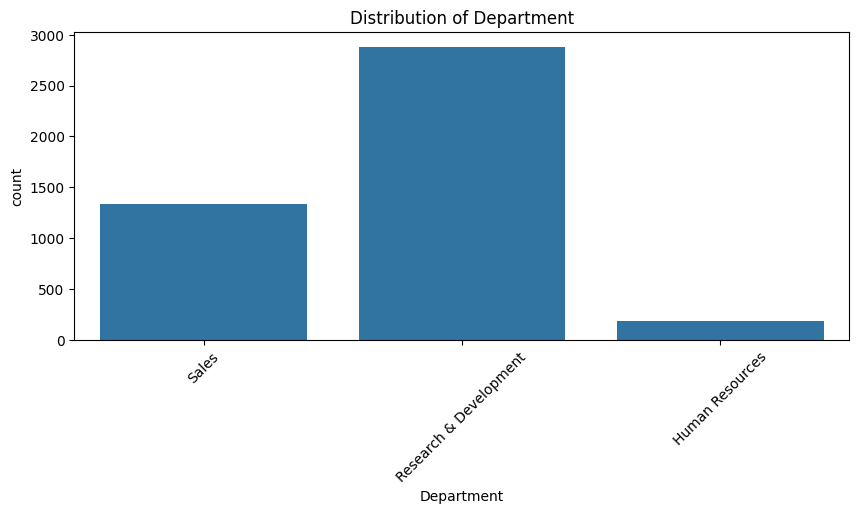

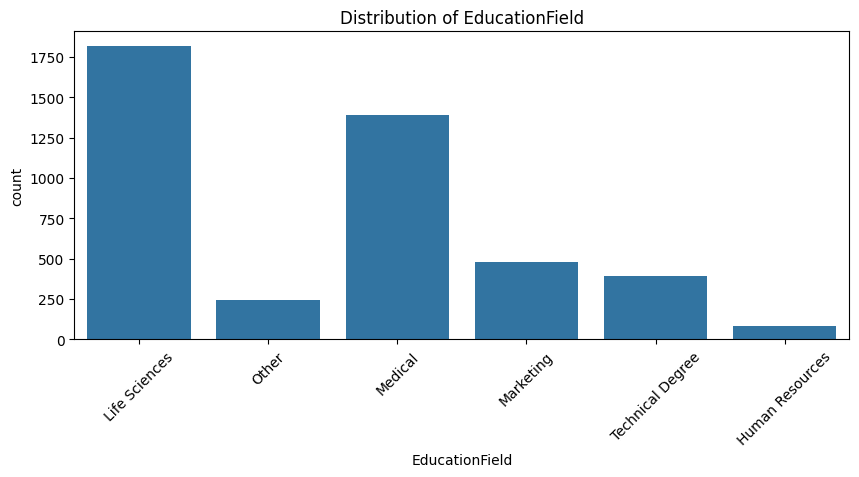

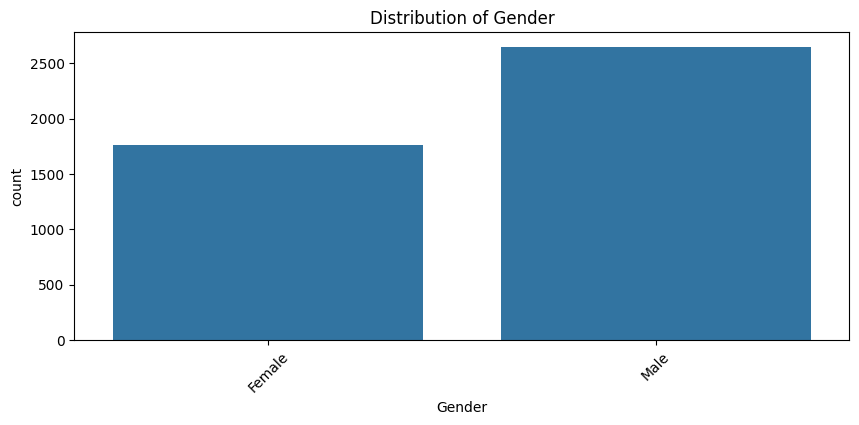

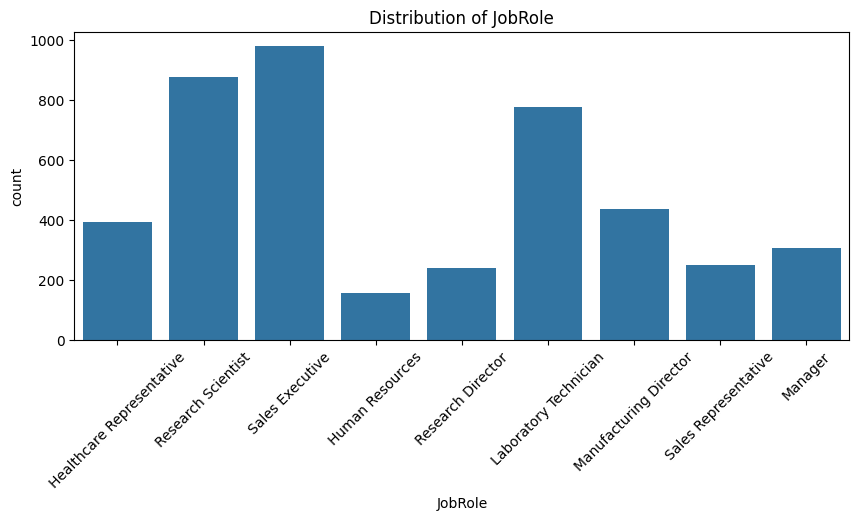

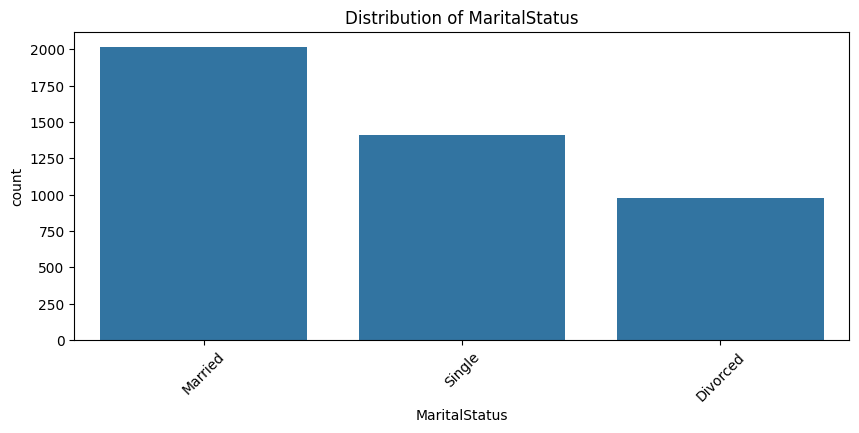

In [77]:
# Univariate analysis for numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

    print(f"Statistiques pour {column}:")
    print(data[column].describe())
    print("\n")
    
# Univariate analysis for categorical features
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=data[column])
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

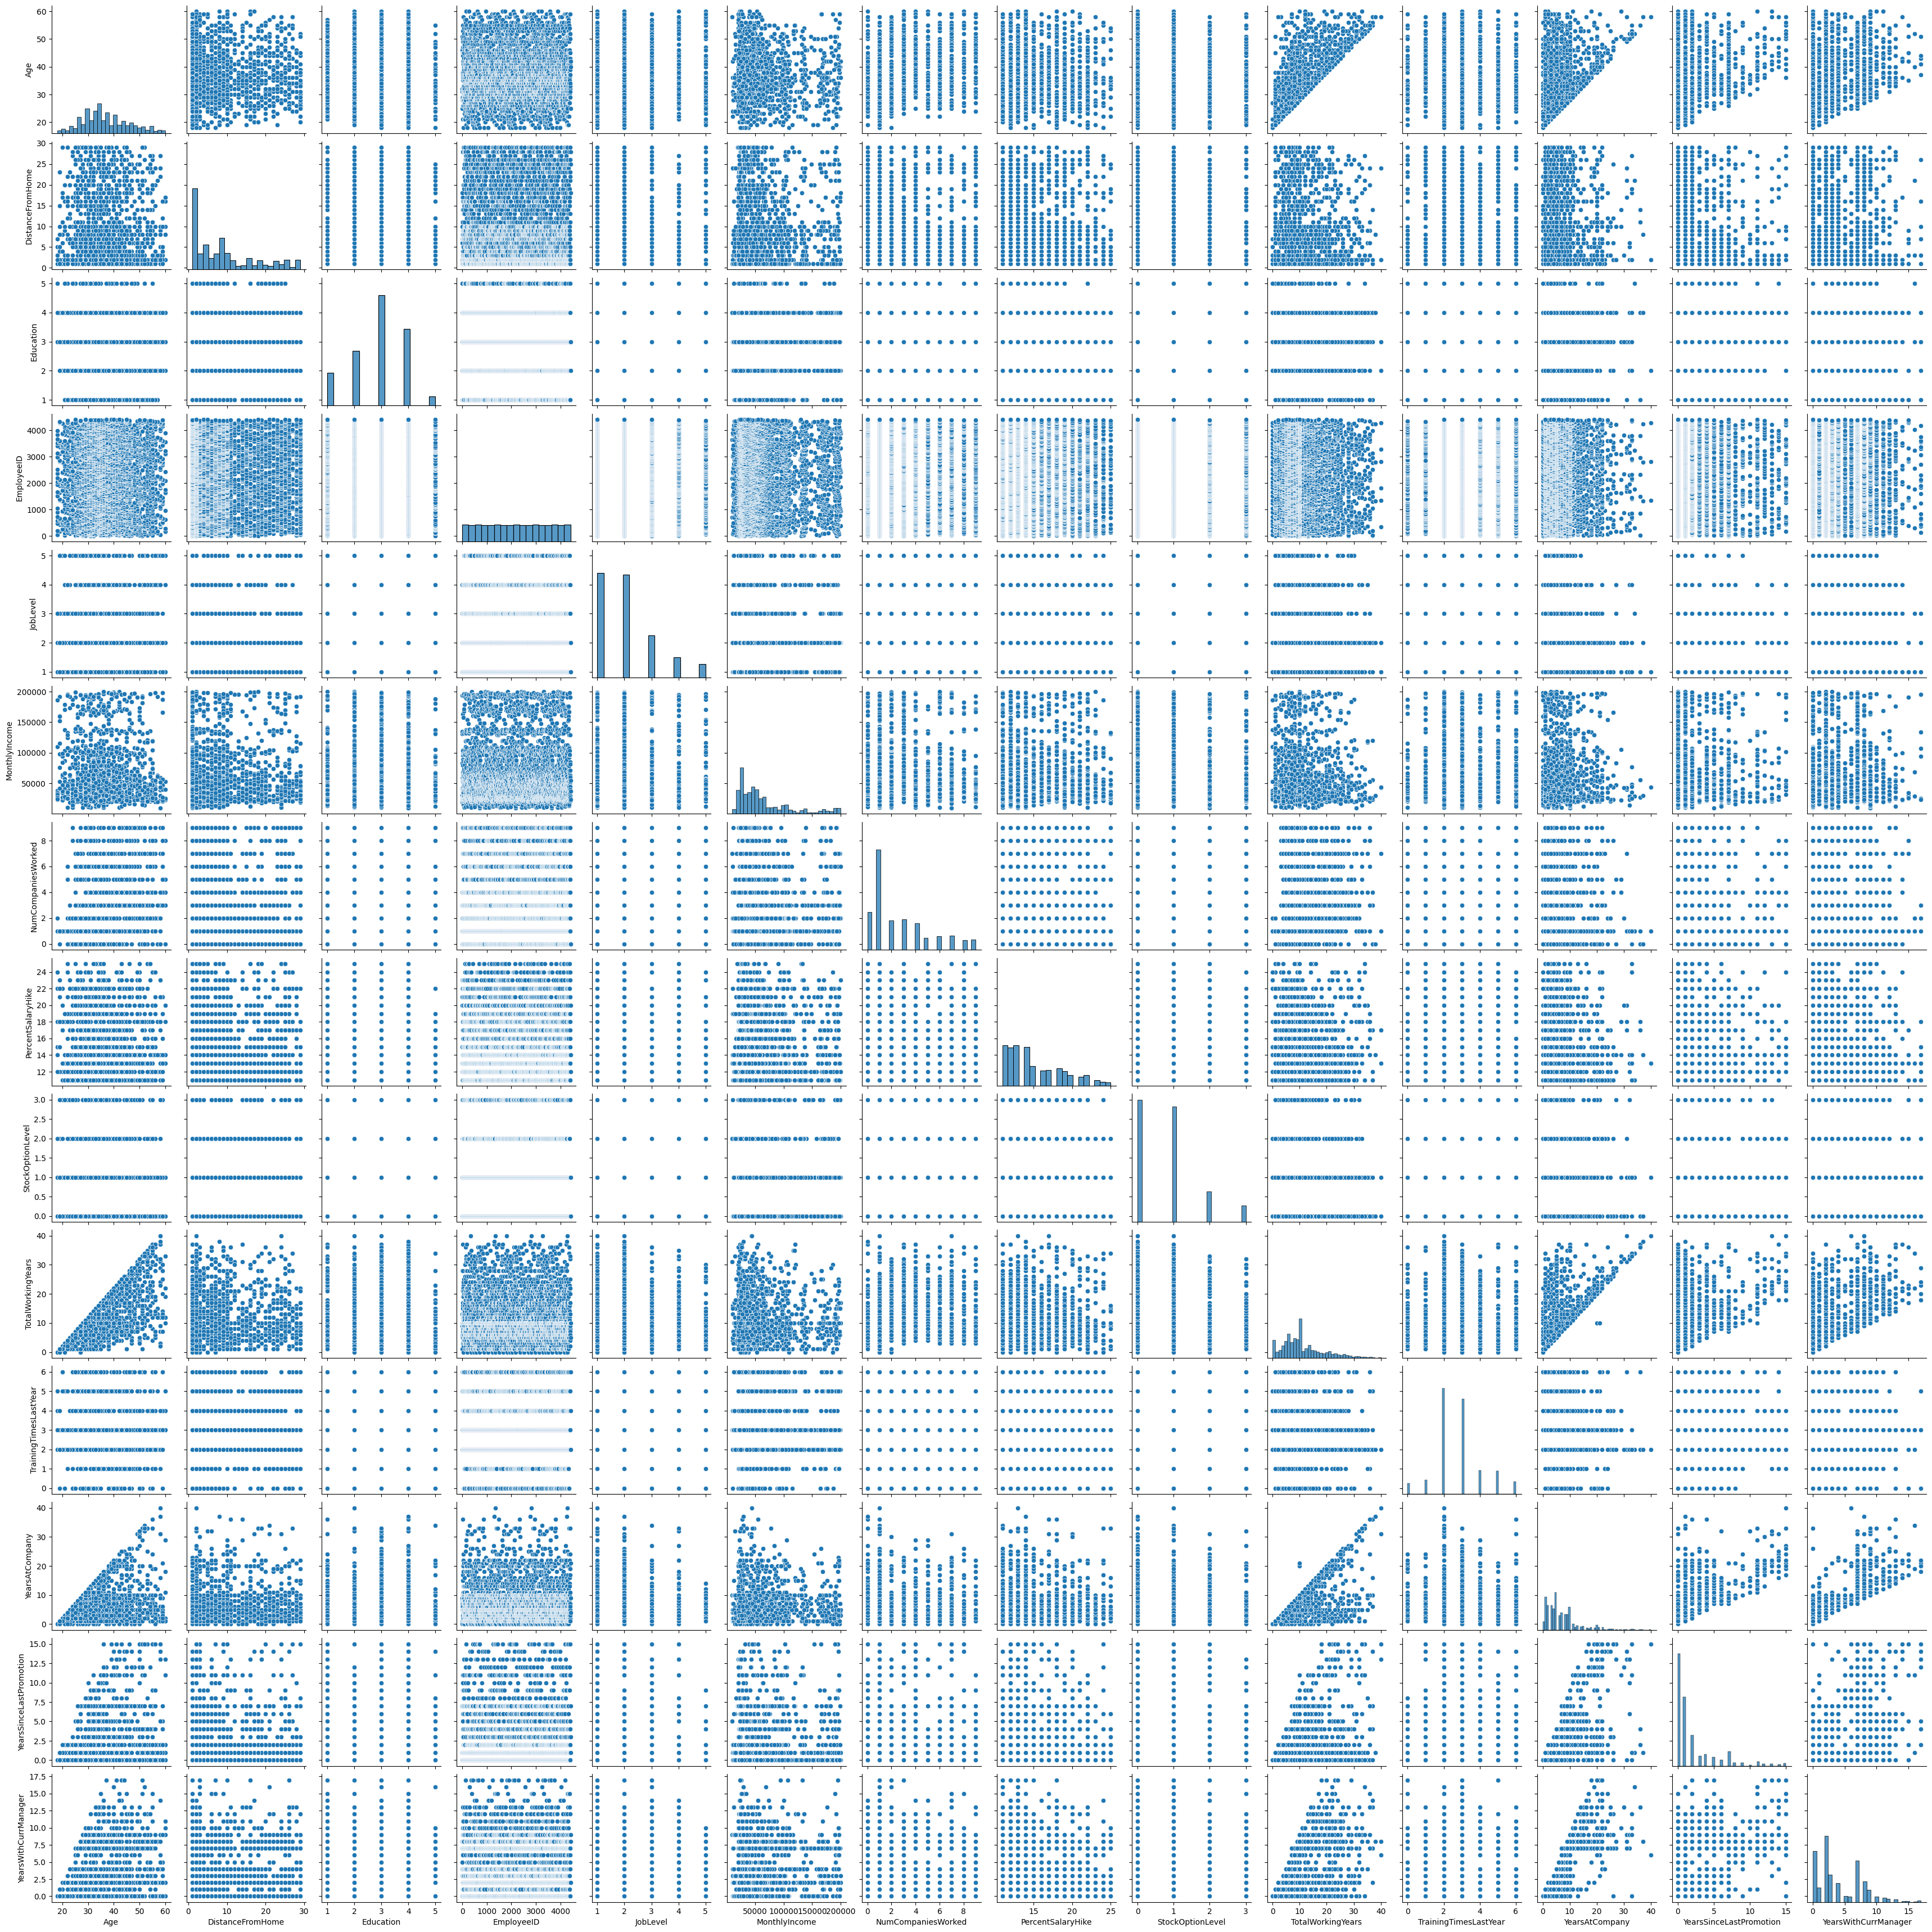

In [78]:
# Scatter plots for pairs of numerical features
sns.pairplot(data[numerical_columns])
plt.show()

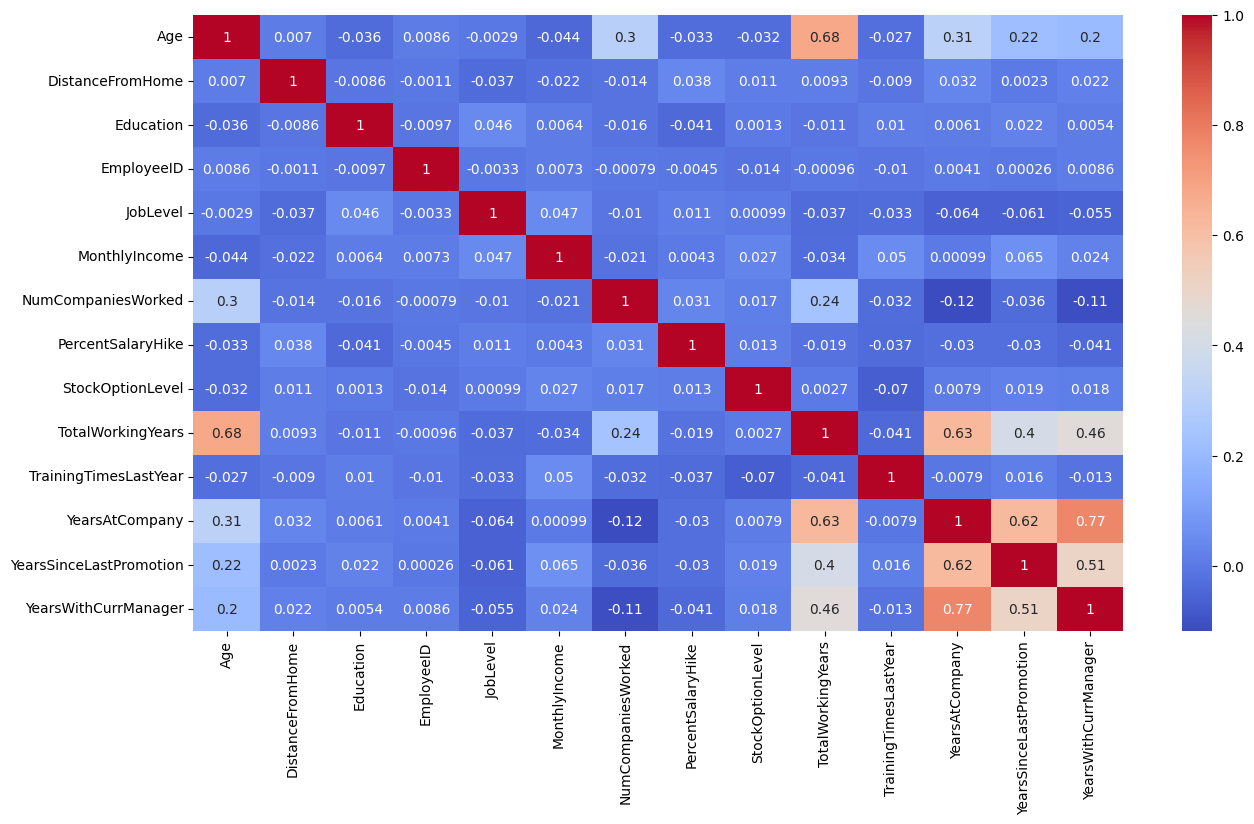

In [79]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['number'])

# Calculer la corrélation et afficher la heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.show()

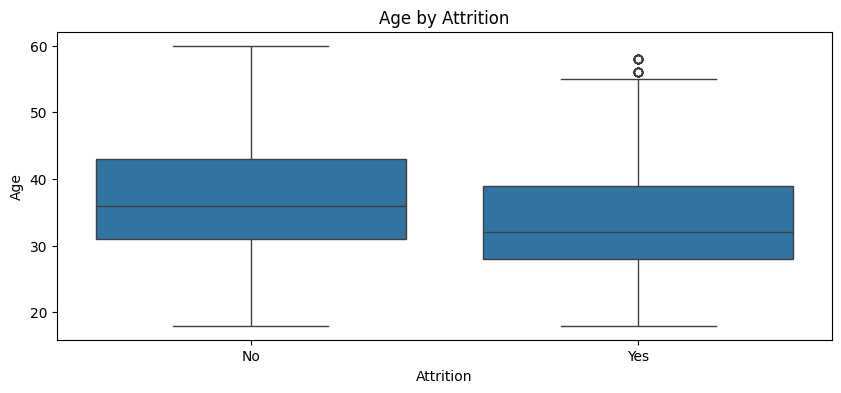

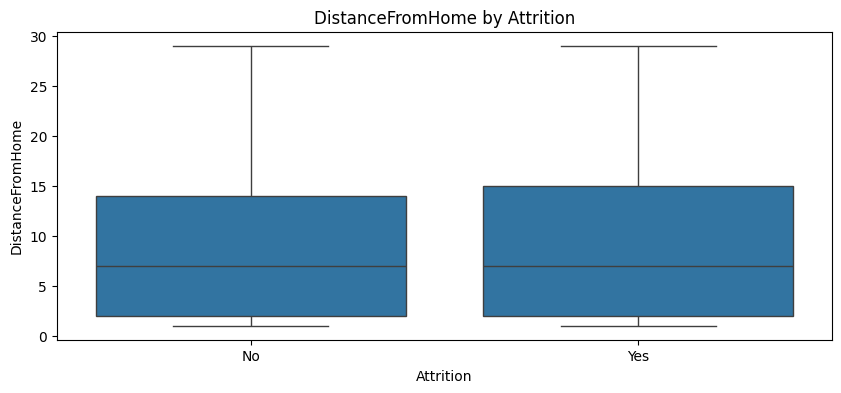

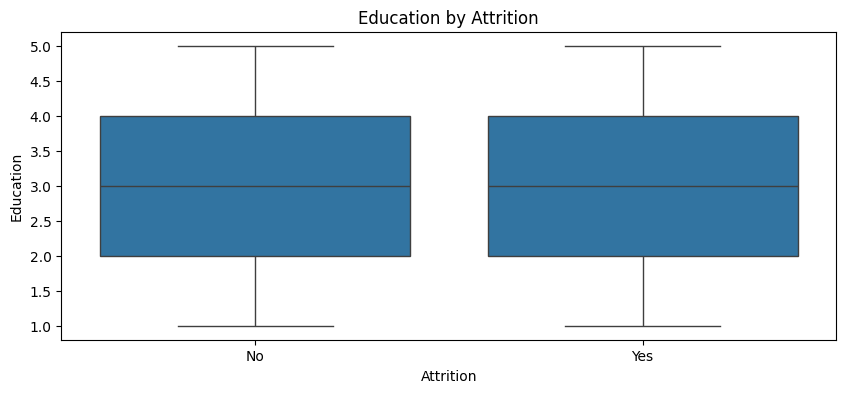

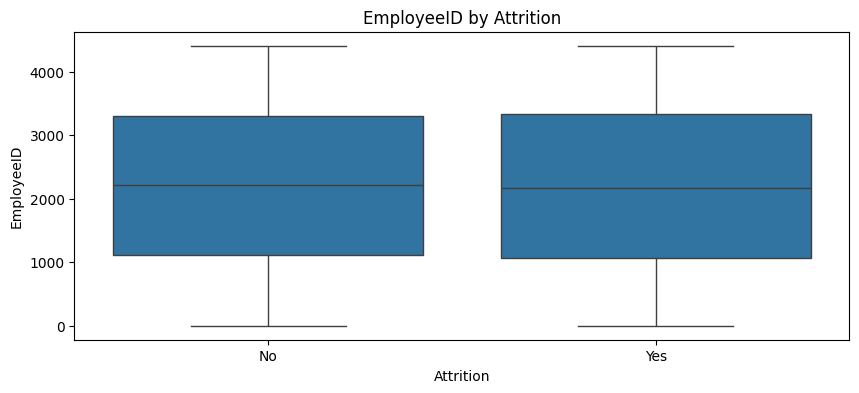

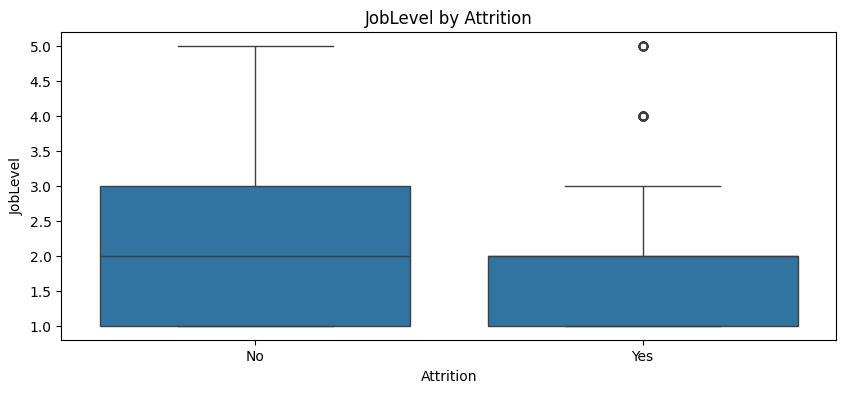

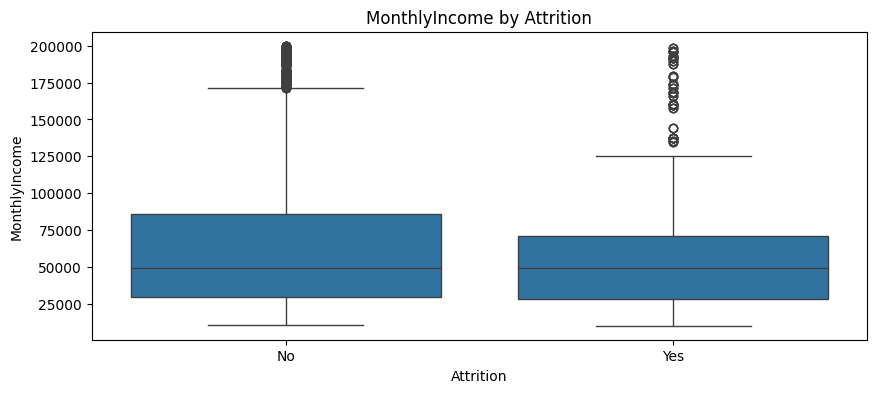

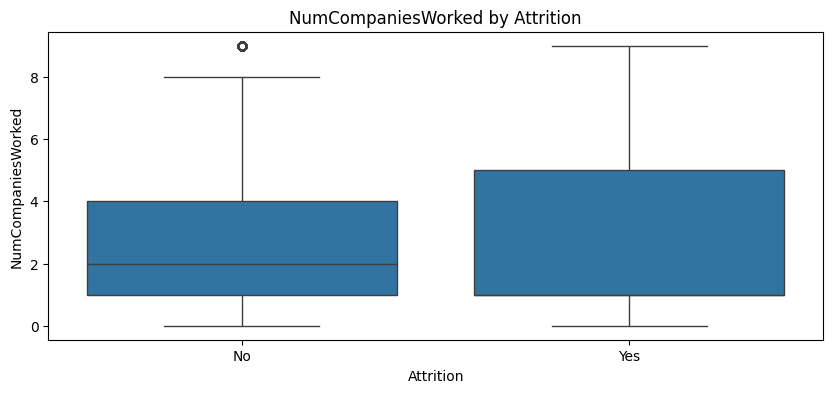

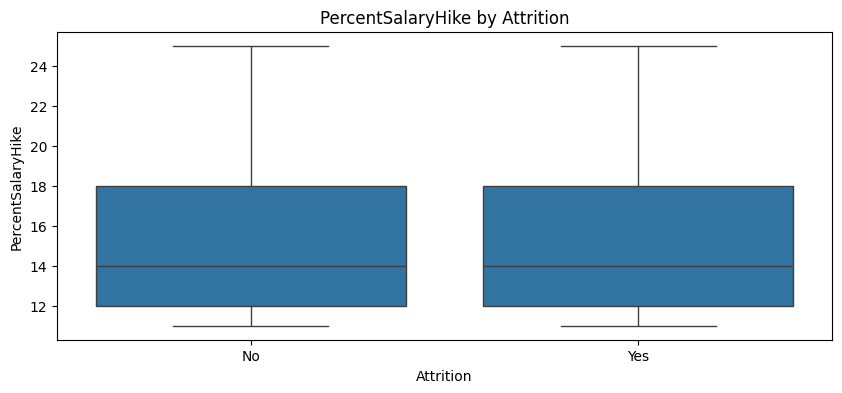

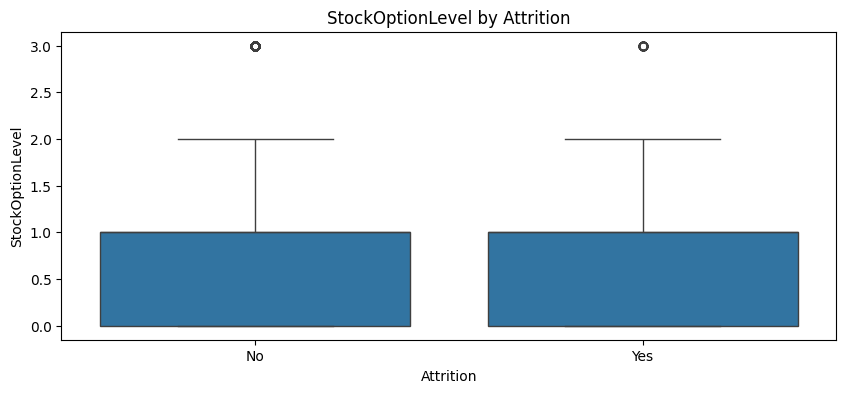

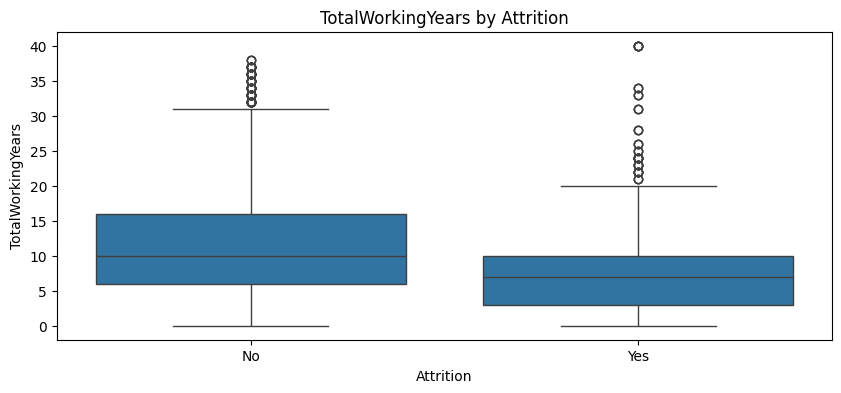

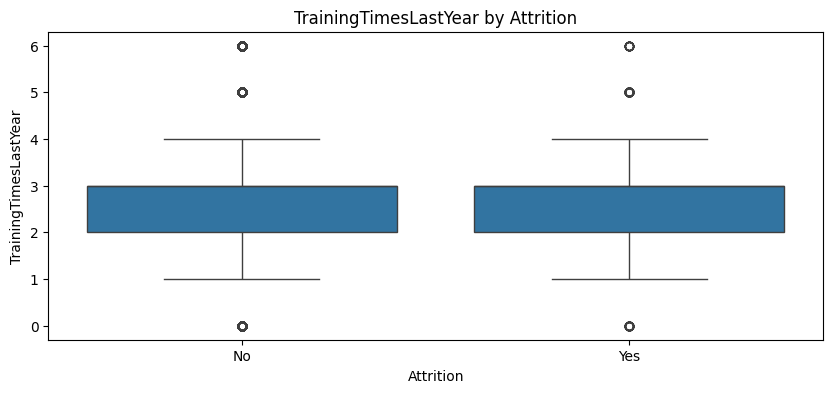

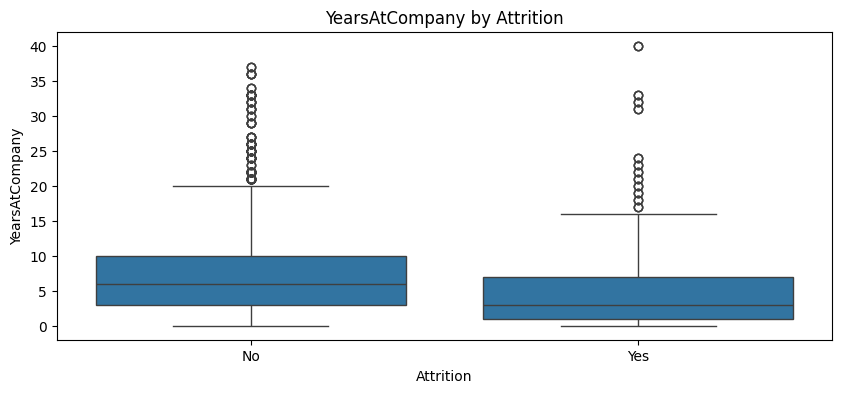

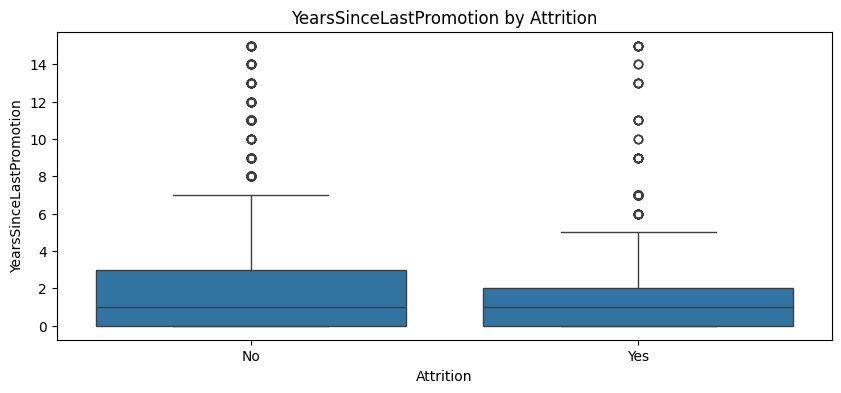

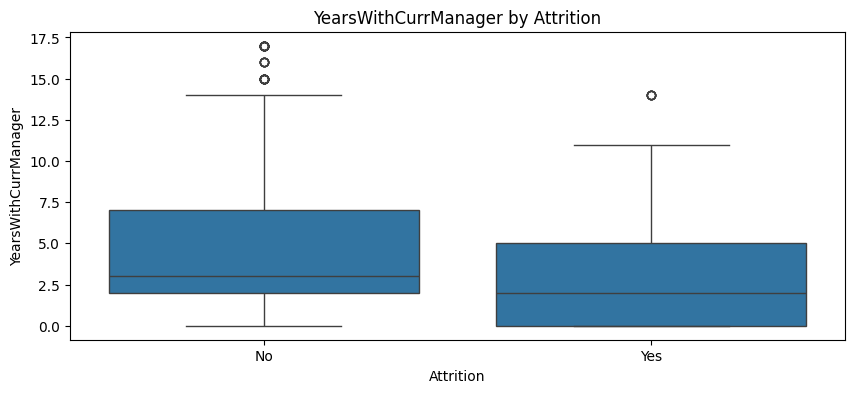

In [80]:
# Box plots for categorical vs numerical features

for categorical_column in categorical_columns:
    for column in numerical_columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=data[categorical_column], y=data[column])
        plt.title(f'{column} by {categorical_column}')
        plt.show()
    break